# Import Required Library

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os 

# Get the Path for Images

In [2]:
COVID_PATH = "Data/train/COVID19/"
NORMAL_PATH = "Data/train/NORMAL/"

**copy data from dataset in to train folder**

In [3]:
train_path = "Data/train/"
val_path = './COVID19-DATASET/val'
test_path = 'Data/test/'

# Define Constants

In [4]:

IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2

In [5]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [6]:
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['COVID19', 'NORMAL', 'PNEUMONIA'] 
 and the length is : 3


# Load the Data / Images

## For Training dataset

In [7]:
# Image Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [8]:

training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 5144 images belonging to 3 classes.


## For Test Dataset

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1288 images belonging to 3 classes.


In [11]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:

for layer in vgg.layers:
    layer.trainable = False

In [13]:

x = Flatten()(vgg.output)
# Instead of just giving us raw numbers, it gives us probabilities
prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [14]:

model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set)//BATCH_SIZE,
  validation_steps=len(test_set)//BATCH_SIZE
)

Epoch 1/20


d:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 82s 14s/step - accuracy: 0.6361 - loss: 1.1436 - val_accuracy: 0.8125 - val_loss: 0.4662
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 55s 11s/step - accuracy: 0.7042 - loss: 0.8459 - val_accuracy: 0.8750 - val_loss: 0.3464
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 56s 12s/step - accuracy: 0.8714 - loss: 0.3955 - val_accuracy: 0.7812 - val_loss: 0.6178
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 57s 12s/step - accuracy: 0.8712 - loss: 0.3412 - val_accuracy: 1.0000 - val_loss: 0.0952
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 56s 12s/step - accuracy: 0.9158 - loss: 0.2408 - val_accuracy: 0.7812 - val_loss: 0.3361
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 55s 11s/step - accuracy: 0.9154 - loss: 0.2628 - val_accuracy: 0.9062 - val_loss: 0.2931
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 55s 11s/step - accuracy: 0.9211 - loss: 0.2351 - val_accuracy: 0.9062 - val_loss: 0.2348
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 55s 11s/step - accuracy: 0.9205 - loss: 0.2864 - val_accuracy: 0.9062 - val_loss: 0.2346
Epoch 9/20


In [18]:
model.save('my_model.h5')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
true_labels = test_set.classes

# Calculate precision, recall, and F1-score
print(classification_report(true_labels, y_pred))

# Calculate confusion matrix
conf_mat = confusion_matrix(true_labels, y_pred)
print(conf_mat)


41/41 ━━━━━━━━━━━━━━━━━━━━ 345s 8s/step
              precision    recall  f1-score   support

           0       0.07      0.05      0.06       116
           1       0.21      0.26      0.23       317
           2       0.64      0.61      0.63       855

    accuracy                           0.48      1288
   macro avg       0.31      0.31      0.31      1288
weighted avg       0.49      0.48      0.48      1288



# Evaluate the Model

([<matplotlib.axis.XTick at 0x235d6085b80>,
 [Text(0.5, 0, 'Covid'),
  Text(1.5, 0, 'Viral Pneumonia'),
  Text(2.5, 0, 'Normal')])

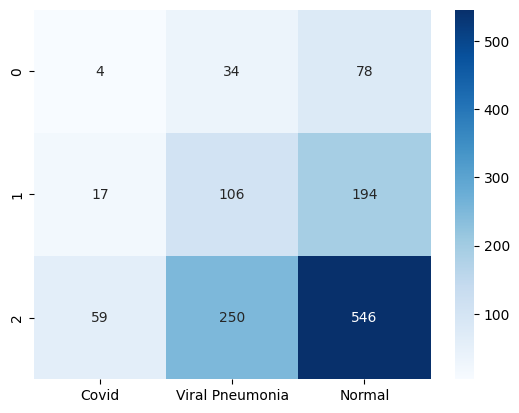

In [20]:
# cm = confusion_matrix(np.asarray(test_set).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
# print(cm)
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

tick_labels = ['Covid', 'Viral Pneumonia', 'Normal']
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels)




In [21]:
val_path = 'Data/test/'

In [22]:

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1288 images belonging to 3 classes.


In [23]:
validation_steps = 200

loss0,accuracy0 = model.evaluate(validation_set, steps = validation_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

d:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.9027 - loss: 0.2428 
loss: 0.25
accuracy: 0.90


d:\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [24]:

validation_set2 = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = 1,
    shuffle=False, 
    seed=42, 
    class_mode="binary"
)


Found 1288 images belonging to 3 classes.


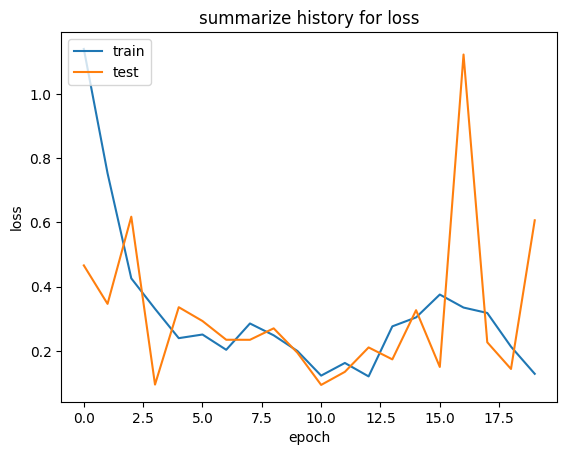

In [25]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation (Test) loss')
plt.title('summarize history for loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

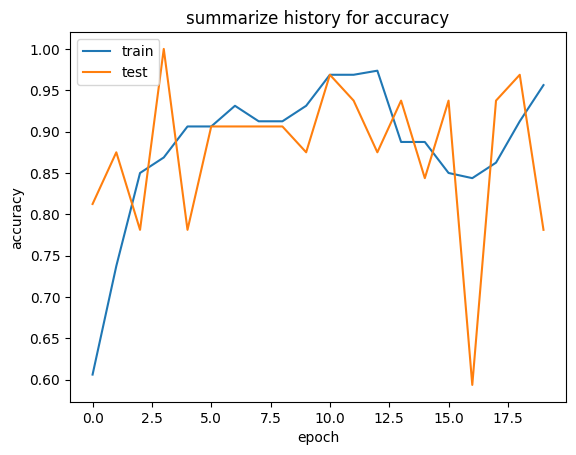

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('summarize history for accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predict

In [27]:
img_normal = image.load_img("Data/test/NORMAL/NORMAL(1267).jpg", target_size = (224, 224))
img_pneumonia = image.load_img("Data/test/COVID19/COVID19(462).jpg", target_size = (224, 224))

In [28]:
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    if(result[0][0]<.50):
        result="normal"
    else:
        result="corona positive"
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


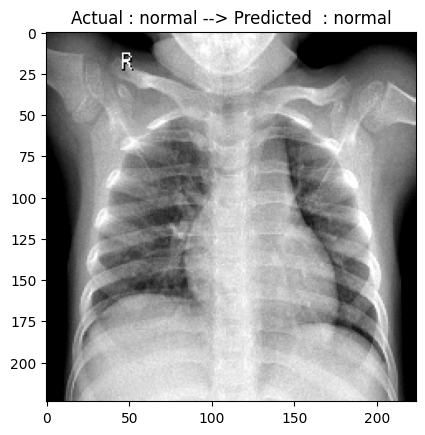

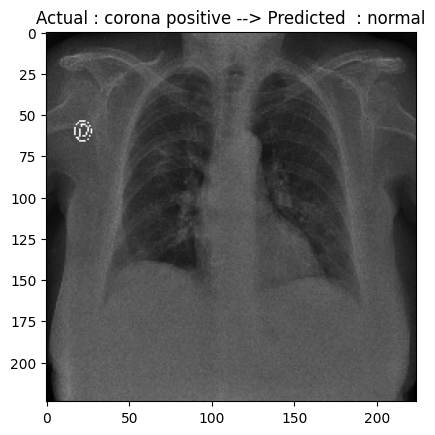

In [29]:
pred_normal = model_predict(img_normal, "normal")
pred_pneumonia = model_predict(img_pneumonia, "corona positive")